<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/frutas_bexiga_parte_02_nov_06_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# parte 1- le os arquivos e separa eles em a e b (a frutas deitadas e b sao as frusta em pe)
# parte 2- usa o filtro e calcula o volume

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from skimage import feature
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

In [3]:
!gdown --id 1PbOf7-WA_t4FKOGkOgIi3dioOxaOr6Q_

Downloading...
From: https://drive.google.com/uc?id=1PbOf7-WA_t4FKOGkOgIi3dioOxaOr6Q_
To: /content/Bexigas.zip
100% 229M/229M [00:01<00:00, 170MB/s]


In [4]:
import zipfile
file_name = zipfile.ZipFile('Bexigas.zip', 'r')
file_name.extractall()

In [5]:
FILE='Bexigas.zip'
img_name=[]
x_original = [] 

ref ='jpg'

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:]==ref):
        img_name.append(name)
        #x_original.append(cv2.resize(cv2.imread(name),(60,80)))
        x_original.append(cv2.resize(cv2.imread(name,0),(60,80)))


Text(0.5, 1.0, '3b.jpg')

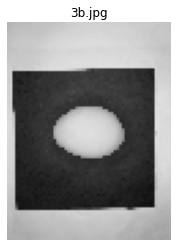

In [6]:
Ind = 5
img= x_original[Ind]
plt.axis("off")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(img_name[Ind])

In [7]:
'''
for name in img_name:
  if(name[-5]=='a'):
    print(name)
'''

"\nfor name in img_name:\n  if(name[-5]=='a'):\n    print(name)\n"

In [8]:
name_down=[]  # down representa as frutas deitadas
original_down = [] 
name_up=[] # down representa as frutas em pe
original_up= [] 

In [9]:
k = 0
for name in img_name:
  if(name[-5]=='a'):
    name_up.append(name)
    original_up.append(x_original[k])
  else:
    name_down.append(name)
    original_down.append(x_original[k])
  k = k +1


In [10]:
# print(name_down) 
# print(name_up)

Text(0.5, 1.0, '6b.jpg')

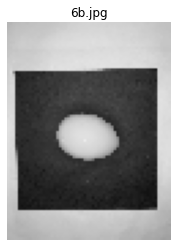

In [11]:
Ind = 5
img= original_down[Ind]
plt.axis("off")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(name_down[Ind])

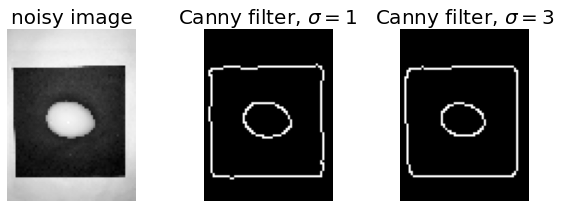

In [12]:
im = img
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [13]:
nrows,ncols =edges2.shape
Foto = np.ones((nrows,ncols))*255
for i in range(nrows):
  for j in range(ncols):
    if edges2[i,j] == True:
      Foto[i,j]=0

In [14]:
Foto = Foto.astype(int)

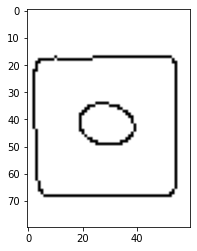

In [15]:
plt.imshow(Foto, cmap=plt.cm.gray)

In [16]:
# calculo do raio horizontal
Quadrado = []
Raio = []
for i in range(nrows):
  values = np.zeros(4)
  k = -1
  for j in range(1,ncols):
    if(Foto[i,j-1]==255 and Foto[i,j]==0):
      if(k<4):
        k = k+1
        values[k]=j
  L = values[3] - values[0]
  d = values[2] - values[1]
  Quadrado.append(L)
  Raio.append(d)

L = np.array(Quadrado).max()
print(L)
Raio = np.array(Raio).max()
print(Raio)

medida = Raio/L*14.5
print('raio horizontal=',medida)

52.0
42.0
raio horizontal= 11.711538461538462
